## Prediction of extreme snowmelt from SHMI data

In [1]:
import pandas as pd
import seaborn as sns


### Data cleaning and exploration

In [71]:
# import files

snow_df = pd.read_csv('../snow.csv', low_memory=False)
flow_df = pd.read_csv('../flow.csv', low_memory=False)
temp_df = pd.read_csv('../temp.csv', low_memory=False)
prec_df = pd.read_csv('../prec.csv', low_memory=False)
snow_sites = pd.read_csv('../snow_sites.csv', low_memory=False)
flow_sites = pd.read_csv('../flow_sites.csv', low_memory=False)
site_pairs_flow = pd.read_csv('../site_pairs_clean.csv', low_memory=False)
site_pairs_temp = pd.read_csv('../site_pairs_temp.csv', low_memory=False)
site_pairs_prec = pd.read_csv('../site_pairs_prec.csv', low_memory=False)


In [74]:
## Remove measurements with low quality and add year to dataframe

def remove_low_quality(df, quality_values):
	df = df[df['quality'].isin(quality_values)]
	df.date = pd.to_datetime(df.date)
	df['year'] = df.date.dt.year
	return df


In [75]:
# Look at snow data
snow_df = remove_low_quality(snow_df, ['G', 'Y'])
snow_df['snow_depth'] = snow_df['snow_depth'].astype(float)
snow_df.head()


/home/cecilia/.local/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-74-ae0e46d7cf7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.dt.year


,date,time,snow_depth,quality,site_id,id,name,latitude,longitude,year
0,1945-01-02,07:00:00,0.67,G,173010,173010,Aapua,66.8656,23.4951,1945
1,1945-01-03,07:00:00,0.67,G,173010,173010,Aapua,66.8656,23.4951,1945
2,1945-01-04,07:00:00,0.66,G,173010,173010,Aapua,66.8656,23.4951,1945
3,1945-01-05,07:00:00,0.65,G,173010,173010,Aapua,66.8656,23.4951,1945
4,1945-01-06,07:00:00,0.65,G,173010,173010,Aapua,66.8656,23.4951,1945


In [76]:
# Look at flow data
flow_df = flow_df.drop(['Unnamed: 0'], axis=1)
flow_df.columns = ['date', 'flow', 'quality',
                   'site_id', 'id', 'name', 'latitude', 'longitude']
flow_df = remove_low_quality(flow_df, ['G', 'Y', 'O'])
flow_df['flow'] = flow_df['flow'].astype(float)
flow_df.head()


/home/cecilia/.local/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-74-ae0e46d7cf7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.dt.year


,date,flow,quality,site_id,id,name,latitude,longitude,year
0,1984-08-17,106.7242,G,2357,2357,ABISKO,68.3559,18.8208,1984
1,1984-08-18,103.7052,G,2357,2357,ABISKO,68.3559,18.8208,1984
2,1984-08-19,99.4413,G,2357,2357,ABISKO,68.3559,18.8208,1984
3,1984-08-20,93.1354,G,2357,2357,ABISKO,68.3559,18.8208,1984
4,1984-08-21,93.7860,G,2357,2357,ABISKO,68.3559,18.8208,1984


In [77]:
# Look at temperature data
temp_df = remove_low_quality(temp_df, ['Y'])
temp_df['temp'] = temp_df['temp'].astype(float)
temp_df.head()


/home/cecilia/.local/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-74-ae0e46d7cf7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.dt.year


,date,temp,quality,site_id,id,name,latitude,longitude,year
0,1985-05-02,-1.6,Y,154860,154860,Abelvattnet Aut,65.53,14.97,1985
1,1985-05-03,-3.1,Y,154860,154860,Abelvattnet Aut,65.53,14.97,1985
2,1985-05-04,-1.5,Y,154860,154860,Abelvattnet Aut,65.53,14.97,1985
3,1985-05-05,-0.3,Y,154860,154860,Abelvattnet Aut,65.53,14.97,1985
4,1985-05-06,1.2,Y,154860,154860,Abelvattnet Aut,65.53,14.97,1985


In [78]:
# Look at precipitation data
prec_df = remove_low_quality(prec_df, ['G', 'Y'])
prec_df['prec'] = prec_df['prec'].astype(float)
prec_df.head()


/home/cecilia/.local/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-74-ae0e46d7cf7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.date.dt.year


,date,prec,quality,site_id,id,name,latitude,longitude,year
0,1945-01-02,2.0,G,173010,173010,Aapua,66.8656,23.4951,1945
1,1945-01-03,0.0,G,173010,173010,Aapua,66.8656,23.4951,1945
2,1945-01-04,0.0,G,173010,173010,Aapua,66.8656,23.4951,1945
3,1945-01-05,0.0,G,173010,173010,Aapua,66.8656,23.4951,1945
4,1945-01-06,0.0,G,173010,173010,Aapua,66.8656,23.4951,1945


In [79]:
# convert snow depth to binary variable (1 if depth is more than 0.05m shallower than two days before)
snow_df['depth_diff'] = snow_df.groupby(['site_id']).snow_depth.diff(periods=2)
snow_df['binary'] = (snow_df['depth_diff'] < -0.05).astype(int)
snow_df.head()


,date,time,snow_depth,quality,site_id,id,name,latitude,longitude,year,depth_diff,binary
0,1945-01-02,07:00:00,0.67,G,173010,173010,Aapua,66.8656,23.4951,1945,NaN,0
1,1945-01-03,07:00:00,0.67,G,173010,173010,Aapua,66.8656,23.4951,1945,NaN,0
2,1945-01-04,07:00:00,0.66,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.01,0
3,1945-01-05,07:00:00,0.65,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.02,0
4,1945-01-06,07:00:00,0.65,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.01,0


In [80]:
# remove rows where previous value is not two days away
snow_df['date_diff'] = snow_df.groupby(['site_id']).date.diff(periods=2)
snow_df = snow_df[snow_df['date_diff'] == pd.Timedelta(days=2)]
snow_df.head()


,date,time,snow_depth,quality,site_id,id,name,latitude,longitude,year,depth_diff,binary,date_diff
2,1945-01-04,07:00:00,0.66,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.01,0,2 days
3,1945-01-05,07:00:00,0.65,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.02,0,2 days
4,1945-01-06,07:00:00,0.65,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.01,0,2 days
5,1945-01-07,07:00:00,0.64,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.01,0,2 days
6,1945-01-08,07:00:00,0.64,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.01,0,2 days


In [81]:
print('Percentage of extreme snowmelt events: ', round(snow_df.binary.sum() / snow_df.binary.count() * 100, 2), '%')

Percentage of extreme snowmelt events:  5.18 %


In [82]:
snow_df[snow_df['binary'] == 1]

,date,time,snow_depth,quality,site_id,id,name,latitude,longitude,year,depth_diff,binary,date_diff
81,1945-03-24,07:00:00,0.78,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.06,1,2 days
85,1945-03-28,07:00:00,0.68,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.06,1,2 days
86,1945-03-29,07:00:00,0.66,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.06,1,2 days
107,1945-04-19,07:00:00,0.50,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.05,1,2 days
115,1945-04-27,07:00:00,0.31,G,173010,173010,Aapua,66.8656,23.4951,1945,-0.09,1,2 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366665,2011-04-12,06:00:00,0.40,G,171700,171700,Övre Svartlå D,66.0213,21.1727,2011,-0.08,1,2 days
6366667,2011-04-14,06:00:00,0.35,G,171700,171700,Övre Svartlå D,66.0213,21.1727,2011,-0.05,1,2 days
6366668,2011-04-15,06:00:00,0.30,G,171700,171700,Övre Svartlå D,66.0213,21.1727,2011,-0.10,1,2 days
6366670,2011-04-17,06:00:00,0.00,G,171700,171700,Övre Svartlå D,66.0213,21.1727,2011,-0.30,1,2 days


### Get snow, flow, temperature and precipitation sites that are the closest together

In [83]:
# keep snow and flow site pairs that are the closest to each other and lower than 100km
idx = site_pairs_flow.groupby(
    'site_id')['distance'].transform(min) == site_pairs_flow['distance']
site_pairs_flow_unique = site_pairs_flow[idx]
site_pairs_flow_unique = site_pairs_flow_unique[site_pairs_flow_unique['distance'] < 10000]
site_pairs_flow_unique = site_pairs_flow_unique[['site_id', 'snow_site_id']]
site_pairs_flow_unique.columns = ['flow_site_id', 'snow_site_id']
site_pairs_flow_unique

,flow_site_id,snow_site_id
36,44,158900
97,100,126300
109,114,113410
125,164,84040
127,166,74540
...,...,...
533,2372,63050
567,2445,86370
568,2454,85350
569,2506,139420


In [84]:
# keep snow and temperature site pairs that are the closest to each other
idx = site_pairs_temp.groupby(
    'site_id_snow')['dist'].transform(min) == site_pairs_temp['dist']
site_pairs_temp_unique = site_pairs_temp[idx]
site_pairs_temp_unique = site_pairs_temp_unique[site_pairs_temp_unique['dist'] < 1]
site_pairs_temp_unique = site_pairs_temp_unique[['site_id_snow', 'site_id_temp']]
site_pairs_temp_unique.columns = ['snow_site_id', 'temp_site_id']
site_pairs_temp_unique

,snow_site_id,temp_site_id
1,188800,188800
2,158990,158990
10,178790,178790
11,72530,82000
12,73210,73250
...,...,...
665,134100,134100
666,134110,134110
668,102710,102210
669,172790,172790


In [85]:
# keep snow and precipitation site pairs that are the closest to each other
idx = site_pairs_prec.groupby('site_id_snow')['dist'].transform(min) == site_pairs_prec['dist']
site_pairs_prec_unique = site_pairs_prec[idx]
site_pairs_prec_unique = site_pairs_prec_unique[site_pairs_prec_unique['dist'] < 1]
site_pairs_prec_unique = site_pairs_prec_unique[['site_id_snow', 'site_id_prec']]
site_pairs_prec_unique.columns = ['snow_site_id', 'prec_site_id']
site_pairs_prec_unique

,snow_site_id,prec_site_id
0,173010,173010
1,157010,157010
4,188800,188800
5,158990,158990
6,158820,158820
...,...,...
1552,134110,134110
1557,86320,86320
1559,172790,172790
1564,86700,86700


In [86]:
# merge all site pairs by snow site id and save to csv
site_pairs_all = pd.merge(site_pairs_flow_unique, site_pairs_temp_unique, on='snow_site_id')
site_pairs_all = pd.merge(site_pairs_all, site_pairs_prec_unique, on='snow_site_id')
site_pairs_all.to_csv('../site_pairs_all.csv', index=False)
site_pairs_all

,flow_site_id,snow_site_id,temp_site_id,prec_site_id
0,100,126300,126300,126300
1,114,113410,113420,113410
2,164,84040,84050,84040
3,166,74540,74530,74540
4,187,63220,63220,63220
5,1564,63220,63220,63220
6,2155,63220,63220,63220
7,227,72170,72080,72170
8,1640,72170,72080,72170
9,2201,72170,72080,72170


### Merge measurement data for all sites

In [87]:
site_pairs_all = pd.read_csv('../site_pairs_all.csv', low_memory=False)
site_pairs_all.head()

,flow_site_id,snow_site_id,temp_site_id,prec_site_id
0,100,126300,126300,126300
1,114,113410,113420,113410
2,164,84040,84050,84040
3,166,74540,74530,74540
4,187,63220,63220,63220


In [88]:
snow_df_clean = snow_df[['date', 'site_id',
                         'snow_depth', 'depth_diff', 'binary']]
snow_df_clean.columns = ['date', 'snow_site_id', 'snow_depth', 'depth_diff', 'binary']
snow_df_clean

,date,snow_site_id,snow_depth,depth_diff,binary
2,1945-01-04,173010,0.66,-0.01,0
3,1945-01-05,173010,0.65,-0.02,0
4,1945-01-06,173010,0.65,-0.01,0
5,1945-01-07,173010,0.64,-0.01,0
6,1945-01-08,173010,0.64,-0.01,0
...,...,...,...,...,...
6366740,2011-06-26,171700,0.00,0.00,0
6366741,2011-06-27,171700,0.00,0.00,0
6366742,2011-06-28,171700,0.00,0.00,0
6366743,2011-06-29,171700,0.00,0.00,0


In [89]:
flow_df_clean = flow_df[['date', 'site_id', 'flow']]
flow_df_clean.columns = ['date', 'flow_site_id', 'flow']
flow_df_clean

,date,flow_site_id,flow
0,1984-08-17,2357,106.7242
1,1984-08-18,2357,103.7052
2,1984-08-19,2357,99.4413
3,1984-08-20,2357,93.1354
4,1984-08-21,2357,93.7860
...,...,...,...
7377954,1968-02-25,358,16.2000
7377955,1968-02-26,358,15.7000
7377956,1968-02-27,358,16.2000
7377957,1968-02-28,358,16.2000


In [90]:
temp_df_clean = temp_df[['date', 'site_id', 'temp']]
temp_df_clean.columns = ['date', 'temp_site_id', 'temp']
temp_df_clean

,date,temp_site_id,temp
0,1985-05-02,154860,-1.6
1,1985-05-03,154860,-3.1
2,1985-05-04,154860,-1.5
3,1985-05-05,154860,-0.3
4,1985-05-06,154860,1.2
...,...,...,...
9964969,1962-04-21,86700,5.2
9964970,1962-04-22,86700,9.1
9964971,1962-04-28,86700,7.1
9964972,1962-04-29,86700,5.1


In [91]:
prec_df_clean = prec_df[['date', 'site_id', 'prec']]
prec_df_clean.columns = ['date', 'prec_site_id', 'prec']
prec_df_clean

,date,prec_site_id,prec
0,1945-01-02,173010,2.0
1,1945-01-03,173010,0.0
2,1945-01-04,173010,0.0
3,1945-01-05,173010,0.0
4,1945-01-06,173010,0.0
...,...,...,...
23928346,2011-06-26,171700,0.0
23928347,2011-06-27,171700,0.0
23928348,2011-06-28,171700,0.0
23928349,2011-06-29,171700,0.0


In [92]:
## merge all dataframes
all_data = pd.merge(snow_df_clean, site_pairs_all, on='snow_site_id', how='left')
all_data = pd.merge(all_data, flow_df_clean, on=['date', 'flow_site_id'], how='inner')
print('Snow and flow', all_data.shape)
all_data = pd.merge(all_data, temp_df_clean, on=['date', 'temp_site_id'], how='inner')
print('Snow, flow and temperature', all_data.shape)
all_data_clean = pd.merge(all_data, prec_df_clean, on=['date', 'prec_site_id'], how='inner')
print('Snow, flow, temperature and precipitation', all_data_clean.shape)
all_data_clean


Snow and flow (300894, 9)
Snow, flow and temperature (167057, 10)
Snow, flow, temperature and precipitation (166820, 11)


,date,snow_site_id,snow_depth,depth_diff,binary,flow_site_id,temp_site_id,prec_site_id,flow,temp,prec
0,1965-01-14,75280,0.00,0.00,0,1878.0,74240.0,75280.0,0.0510,1.9,1.0
1,1965-01-15,75280,0.00,0.00,0,1878.0,74240.0,75280.0,0.0510,1.2,0.0
2,1965-01-16,75280,0.00,0.00,0,1878.0,74240.0,75280.0,0.0580,1.5,6.2
3,1965-01-20,75280,0.03,0.03,0,1878.0,74240.0,75280.0,0.0760,-0.9,0.0
4,1965-01-21,75280,0.03,0.03,0,1878.0,74240.0,75280.0,0.0760,-1.7,2.7
...,...,...,...,...,...,...,...,...,...,...,...
166815,2021-06-09,160970,0.00,0.00,0,1387.0,160970.0,160960.0,340.1524,17.2,0.0
166816,2021-06-23,160970,0.00,0.00,0,1387.0,160970.0,160960.0,354.6912,14.6,0.0
166817,2021-06-24,160970,0.00,0.00,0,1387.0,160970.0,160960.0,340.7535,17.3,0.0
166818,2021-06-30,160970,0.00,0.00,0,1387.0,160970.0,160960.0,269.8846,15.0,0.0


In [93]:
all_data_clean.isna().sum()


date            0
snow_site_id    0
snow_depth      0
depth_diff      0
binary          0
flow_site_id    0
temp_site_id    0
prec_site_id    0
flow            0
temp            0
prec            0
dtype: int64

In [94]:
all_data_clean.binary.value_counts()


0    156978
1      9842
Name: binary, dtype: int64

In [95]:
print('Percentage of extreme snowmelt events: ', round(
    all_data_clean.binary.sum() / all_data_clean.binary.count() * 100, 2), '%')


Percentage of extreme snowmelt events:  5.9 %


In [104]:
all_data_clean.to_csv('../all_data_clean.csv', index=False)

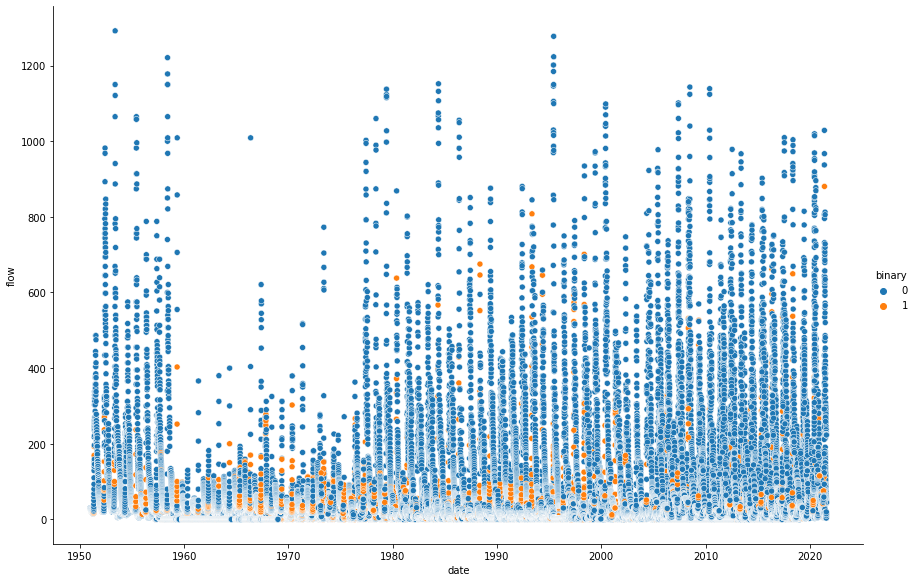

In [96]:
sns.relplot(x="date", y="flow", data=all_data_clean,
            hue="binary", kind="scatter", height=8, aspect=1.5)


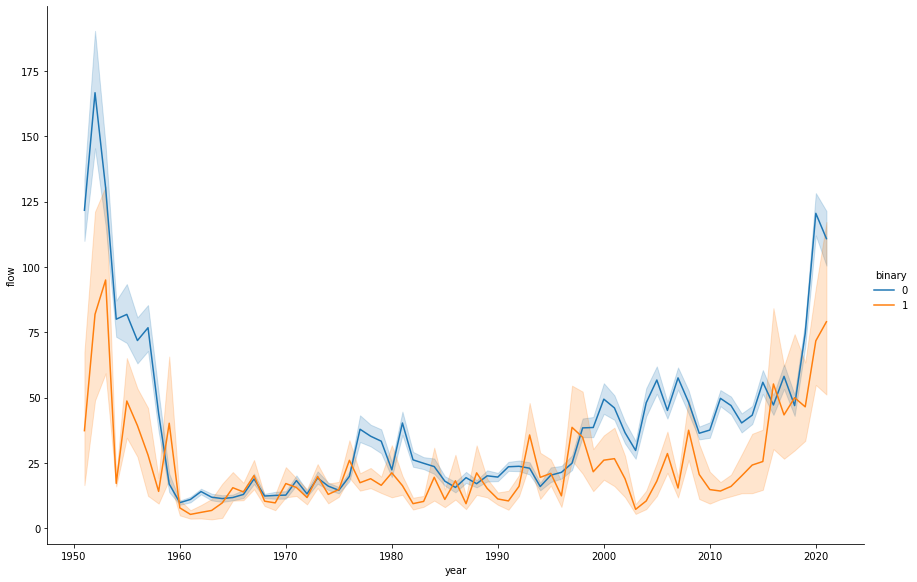

In [97]:
all_data_clean['year'] = all_data_clean.date.dt.year
sns.relplot(x="year", y="flow", hue="binary", data=all_data_clean, kind="line", height=8, aspect=1.5)


<AxesSubplot:xlabel='month', ylabel='flow'>

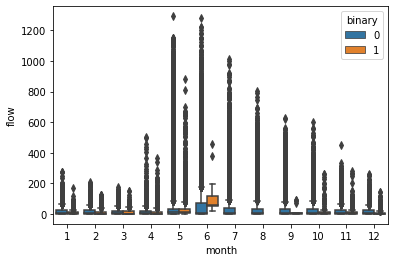

In [98]:
all_data_clean['month'] = all_data_clean.date.dt.month
sns.boxplot(x="month", y="flow", hue="binary", data=all_data_clean)


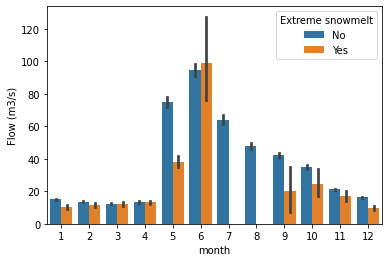

In [99]:
import matplotlib.pyplot as plt

g = sns.barplot(x="month", y="flow", hue="binary", data=all_data_clean)
legend_labels, _ = g.get_legend_handles_labels()
g.legend(legend_labels, ['No', 'Yes'], title='Extreme snowmelt')
plt.ylabel('Flow (m3/s)')
plt.show()


<AxesSubplot:xlabel='month', ylabel='count'>

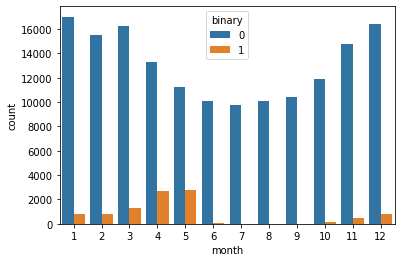

In [100]:
sns.countplot(x="month", hue="binary", data=all_data_clean)


<AxesSubplot:xlabel='binary', ylabel='std'>

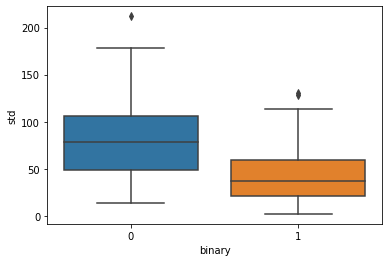

In [101]:

year_mean = all_data_clean.groupby(['year', 'binary'])['flow'].agg(['mean', 'std']).reset_index()
sns.boxplot(x="binary", y="std", data=year_mean)

<AxesSubplot:xlabel='binary', ylabel='mean'>

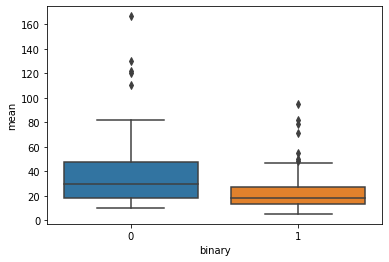

In [102]:
sns.boxplot(x="binary", y="mean", data=year_mean)


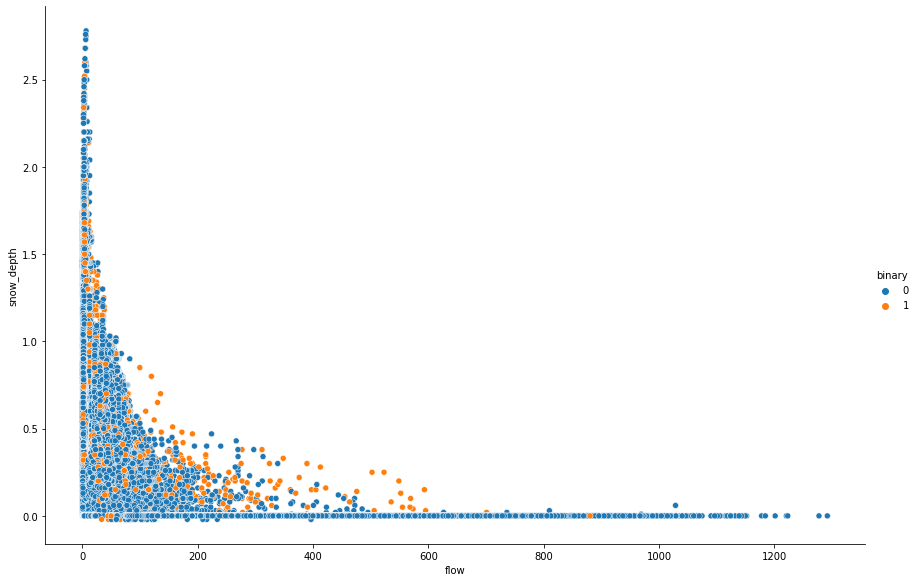

In [103]:
sns.relplot(x="flow", y="snow_depth", hue="binary", data=all_data_clean, kind="scatter", height=8, aspect=1.5)

In [30]:
# add average and max flow for previous month
all_data_clean['year'] = all_data_clean.date.dt.year
all_data_clean['month'] = all_data_clean.date.dt.month
all_data_clean['flow_prev_month'] = all_data_clean.groupby(['year', 'month'])['flow'].transform('mean')
all_data_clean['flow_prev_month_max'] = all_data_clean.groupby(['year', 'month'])['flow'].transform('max')
all_data_clean['site_id'] = all_data_clean['flow_site_id'].astype(str) + " " + all_data_clean['snow_site_id'].astype(str)

<ipython-input-30-92feb052f4a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_clean['year'] = all_data_clean.date.dt.year
<ipython-input-30-92feb052f4a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_clean['month'] = all_data_clean.date.dt.month
<ipython-input-30-92feb052f4a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [31]:
#all_data_clean.to_csv('../all_data_clean.csv')

In [32]:
# TODO: some plots and stats: look at flow vs binary for different time lags

In [33]:
# TODO:
# 0. when do I need to normalize? Yes: RNN, logistic regression, SVM No: random forest, gradient boosting
# 1. try SVM (normalized) with parameters from paper
# 2. use SHAP or LIME for explainability
# 3. use permutation importance to find important features

In [34]:
# Features used to predict binary variable:
# 1. flow (poor, random or worse)
# 2. mean and max flow of the month (poor, random or worse)
# 3. flow + mean and max flow of the month (poor, random or worse)
# 4. flow + mean and max flow of the month + month (poor, random or worse)
# 5. flow + month (poor, random or worse)
# 6. flow basic parameters for previous 30 days: 0.76 when equal split between classes
# 7. flow full parameters with nearmiss undersampling for previous 30 days and no site pairs with distance > 100km: 0.897 (rf)
# 8. 20 days and 30 days not very different, 10 days a bit worse
# 9. Prediction of future max 0.684, but unknown sites without duplicates max 0.875
# 10. forecast snow depth diff much worse than binary
# 11. No big difference in prediction of same day and next 1, 2, 5 and 10 days
# 12. Adding year as feature improves prediction of binary variable
# 13. For timeseries split, best parameters are: max_depth=1, n_estimators=500, max_features=5


In [35]:
# Models tried so far:
# 1. Baseline (always predicts 0)
# 2. Logistic regression
# 3. Histogram gradient boosting
# 4. Random forest
# 5. RNN (LSTM)

In [36]:
# Models to try:
# 2. Convolutional Neural Network?
# 3. Support Vector Machine?
# Various time lags?
# Binary target vs forecasting snow depth difference



In [37]:
# Validation:
# 1. Forecast latest 2 or 5 years for every site
# 2. Keep 5 or 10 sites to check for extrapolation
# Metric: AUC-PR

In [38]:
# Initially only snow depth vs flow, but potentially consider:
# 1. distance between sites (threshold or covariate)
# 2. temperature (nearest to flow site)
# 3. precipitation (nearest to flow site)
# 4. year (any temporal trend?)